In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/business-json/KB-business.json


In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [8]:
df = pd.read_json('/kaggle/input/business-json/KB-business.json').transpose()
df.reset_index(inplace=True)
df.rename(columns={'index': 'Context_id'}, inplace=True)
print(df)

    Context_id                                 has title         is a type of  \
0     Q1043486                                Carl's Jr.           Restaurant   
1     Q1046951                        Target Corporation         Retail store   
2     Q1049970                                   Castrol  Auto parts showroom   
3     Q1060537                                Forever 21        Apparel store   
4     Q1065819                              Mister Donut           Restaurant   
..         ...                                       ...                  ...   
495    Q565734                                   Aral AG       Petrol station   
496    Q571997                              Shinsei Bank                 Bank   
497    Q578832  Powszechna Kasa Oszczędności Bank Polski                 Bank   
498     Q62288                                     Rolex      Accessory store   
499   Q1814247              Sumitomo Electric Industries                 None   

    has headquarters in    

In [10]:
print(df.isna().sum())

Context_id               0
has title                0
is a type of             3
has headquarters in     21
has ceo                278
established on date      8
belongs to industry    159
has parent company     369
origin country         127
produces               409
dtype: int64


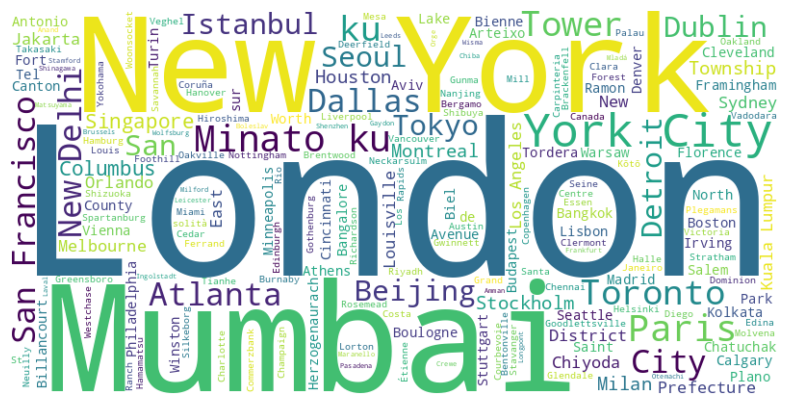

In [13]:
text_data = df['has headquarters in'].dropna().str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
columns = [ 'has title', 'is a type of', 'has headquarters in',
       'has ceo', 'belongs to industry',
       'has parent company', 'origin country', 'produces']

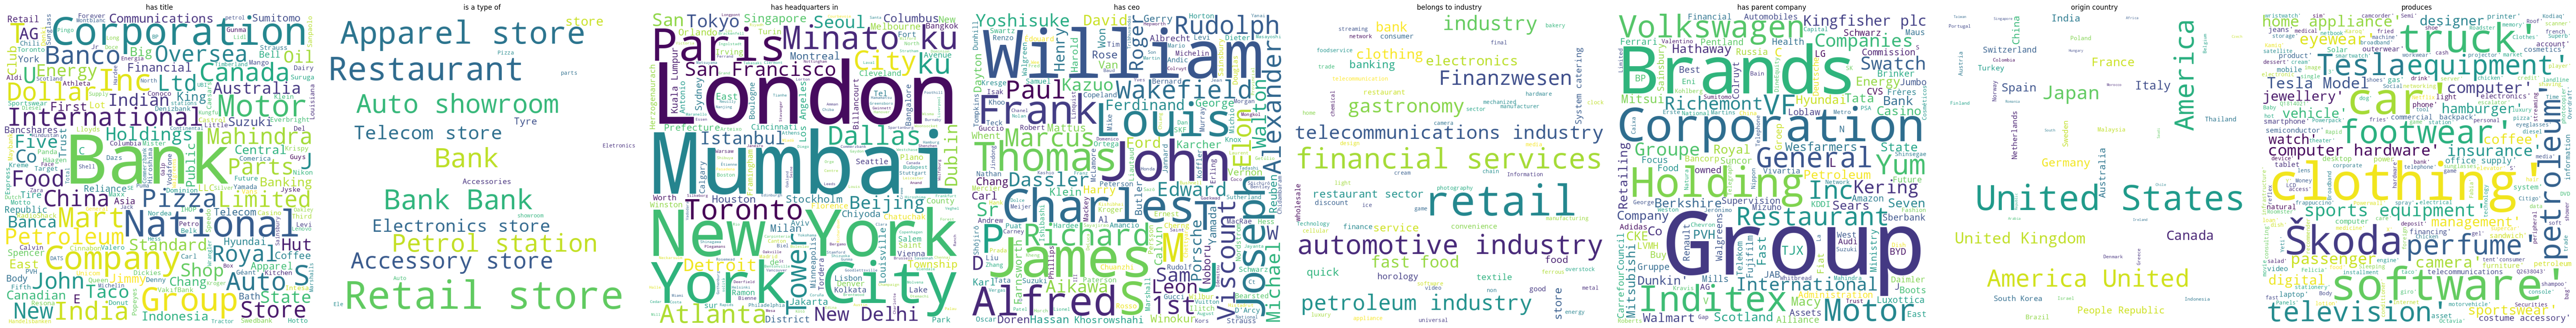

In [21]:

num_columns = len(columns)


fig, axes = plt.subplots(1, num_columns, figsize=(8 * num_columns, 8))

# Generate and plot a word cloud for each column
for i, column in enumerate(columns):
    
    text_data = df[column].dropna().str.cat(sep=' ')
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text_data)
    
    
    if num_columns > 1:
        ax = axes[i]
    else:
        ax = axes
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(column)
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()